In [12]:
import lmdb
import pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from tqdm import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt 

In [16]:
db = lmdb.open('/data/YantiLiu/projects/substructure-ID/datasets/qm9s_raman/qm9s_raman_eval.lmdb', subdir=False, lock=False, map_size=int(1e11))

# Open a transaction and perform a read operation
with db.begin() as txn:
    dset = list(txn.cursor().iternext(values=False))

In [17]:
d1 = []
s1 = []
l1 = []
with db.begin() as txn:
    keys = list(txn.cursor().iternext(values=False))
    for i in keys:
        obj = pickle.loads(txn.get(i))
        d1.append(obj['spectra'])
        s1.append(obj['smiles'])
        l1.append(obj['substructures'])
d1, s1, l1 = np.vstack(d1), np.hstack(s1), np.vstack(l1)

In [54]:
dset = np.load('/data/YantiLiu/projects/multispec/dataset/raman_ir_qm9s.npz', allow_pickle=True)
d , s , l = dset['ir'], dset['smiles'], dset['label_957']

In [62]:
smiles = np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_raman/eval_s.npy')
ids = np.hstack([np.where(s==e)[0] for e in tqdm(smiles, total=len(smiles))])


100%|██████████| 12982/12982 [00:07<00:00, 1853.36it/s]


In [63]:
np.save('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/eval_y.npy', l[ids])
np.save('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/eval_x.npy', d[ids])
np.save('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/eval_s.npy', s[ids])

In [64]:
(np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_raman/eval_s.npy') == np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/eval_s.npy')
).all()

True

Text(0.5, 1.0, 'NC(=O)C1(COC1)C#N')

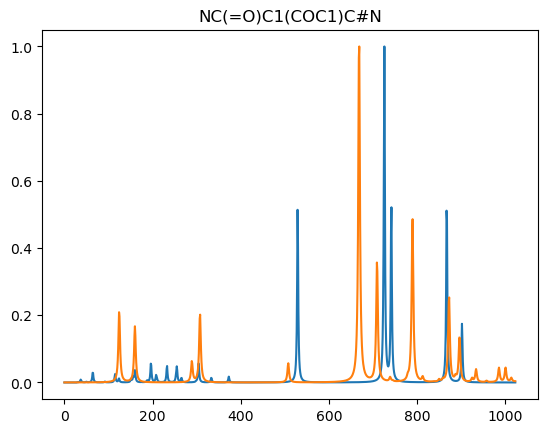

In [17]:
i=1000
raman = np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_raman/test_x.npy')[i]
ir = np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/test_x.npy')[i][::-1]
smiles = np.load('/data/YantiLiu/projects/subs_id/datasets/qm9s_ir/test_s.npy')[i]
plt.plot(raman)
plt.plot(ir)
plt.title(smiles)


In [24]:
mol=Chem.MolFromSmiles(smiles)
Draw.MolsToGridImage(mol, size=(150,150), kekulize=True)

TypeError: object of type 'Mol' has no len()